# ML Diagnostic Part 1

In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sanitation_df = pd.read_csv('311_Service_Requests_-_Sanitation_Code_Complaints.csv')

In [15]:
graffity_df = pd.read_csv('311_Service_Requests_-_Graffiti_Removal.csv')

In [58]:
potholes_df = pd.read_csv('311_Service_Requests_-_Pot_Holes_Reported.csv')

In [50]:
vacant_df = pd.read_csv('311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported.csv')

### Sanitation Analysis

In [85]:
sanitation_df.head()

,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,What is the Nature of this Code Violation?,Street Address,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,Latitude,Longitude,Location,Time_Lapsed
0,01/02/2016,Completed,01/04/2016,16-00015398,Sanitation Code Violation,Other,6959 S PAXTON AVE,60649.0,1.192081e+06,1.859250e+06,5.0,3.0,43.0,41.768766,-87.571478,"(41.768766169704875, -87.57147751207171)",2.0
1,01/02/2016,Completed,01/04/2016,16-00018850,Sanitation Code Violation,Dog feces in yard,8243 S ST LAWRENCE AVE,60619.0,1.181671e+06,1.850471e+06,6.0,6.0,44.0,41.744924,-87.609906,"(41.74492409837845, -87.6099058679411)",2.0
2,01/02/2016,Completed,01/04/2016,16-00020369,Sanitation Code Violation,Garbage in yard,4748 S LOOMIS BLVD,60609.0,1.167798e+06,1.873266e+06,20.0,9.0,61.0,41.807785,-87.660083,"(41.807785222553655, -87.66008284545259)",2.0
3,01/02/2016,Completed,01/05/2016,16-00016767,Sanitation Code Violation,Dumpster not being emptied,1442 N CAMPBELL AVE,60622.0,1.159478e+06,1.909510e+06,1.0,14.0,24.0,41.907417,-87.689603,"(41.90741740180557, -87.68960322899117)",3.0
4,01/02/2016,Completed,01/05/2016,16-00018043,Sanitation Code Violation,Other,9839 S MANISTEE AVE,60617.0,1.196336e+06,1.840261e+06,10.0,4.0,51.0,41.716555,-87.556510,"(41.71655465825793, -87.55651043905326)",3.0


In [83]:
sanitation_df['Type of Service Request'].value_counts()

Sanitation Code Violation    25147
Name: Type of Service Request, dtype: int64

There were 25147 Sanitation Code Violation Requests between January 1st 2016, and March 31st 2017. 

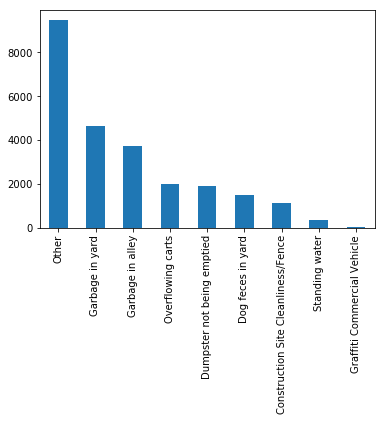

In [4]:
# Observing what kind of sanitation violations are called in and where they are located 
nature_counts = sanitation_df['What is the Nature of this Code Violation?'].value_counts()
nature_counts.plot("bar")

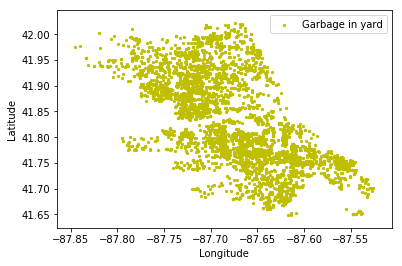

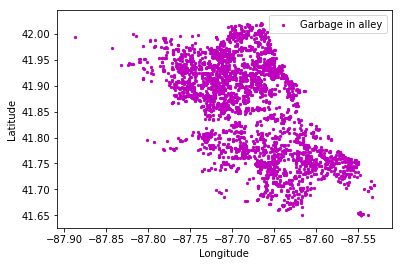

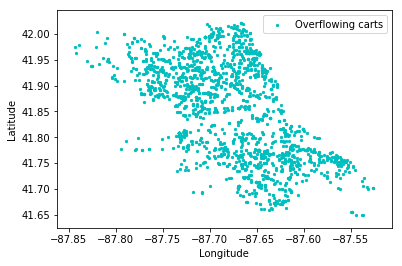

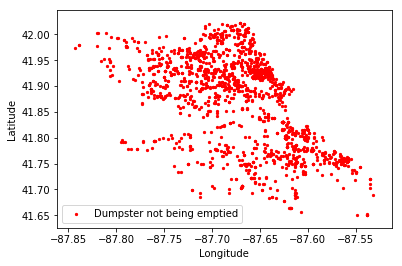

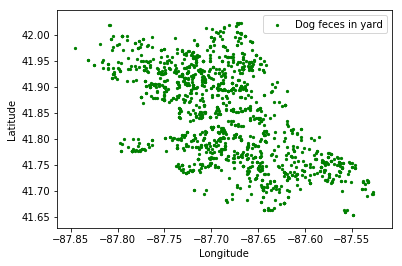

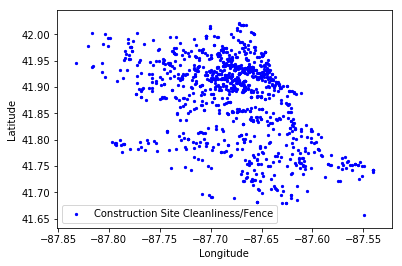

In [5]:
# Visually locating the point of origin for each request that received more than 1000 calls. 
colors = ['y','m', 'c', 'r', 'g', 'b', 'w', 'k']
ind = 0
for ctype, count in nature_counts.iteritems():
    if ctype != 'Other' and count > 1000:
        df = sanitation_df[sanitation_df['What is the Nature of this Code Violation?'] == ctype]
        #df.plot(kind='scatter', x='Longitude', y='Latitude', subplots=True, label=ctype, marker=".", color = 'g')
        df.plot(kind='scatter', x='Longitude', y='Latitude', label=ctype, marker=".", color = colors[ind])
        plt.show()
        ind += 1

We can see that for 'Construction Site Cleanliness, the calls seem to be clustered in the North side of Chicago. Similarly with Dumpsters not being emptied.

In [113]:
# Dropping all 'Other' entries 
san_1 = sanitation_df.copy()
san_1 = san_1.drop(san_1.index[san_1['What is the Nature of this Code Violation?'] == 'Other'])

# Calculating the number of complaint types per ward 
gb = san_1.groupby(['Ward', 'What is the Nature of this Code Violation?'])
counts = gb.size().to_frame().reset_index()

# Renaming column 
counts = counts.rename(columns={0 : "Count"})
counts

,Ward,What is the Nature of this Code Violation?,Count
0,1.0,Construction Site Cleanliness/Fence,58
1,1.0,Dog feces in yard,37
2,1.0,Dumpster not being emptied,60
3,1.0,Garbage in alley,111
4,1.0,Garbage in yard,65
5,1.0,Graffiti Commercial Vehicle,2
6,1.0,Overflowing carts,48
7,1.0,Standing water,17
8,2.0,Construction Site Cleanliness/Fence,39
9,2.0,Dog feces in yard,10


In [116]:
# Finding the top complaint per Ward 
max_counts = counts.groupby('Ward')['Count'].transform(max)
top = counts[counts['Count'] == max_counts] 
top

,Ward,What is the Nature of this Code Violation?,Count
3,1.0,Garbage in alley,111
11,2.0,Garbage in alley,46
19,3.0,Garbage in yard,97
25,4.0,Dumpster not being emptied,52
34,5.0,Garbage in yard,48
41,6.0,Garbage in yard,267
48,7.0,Garbage in yard,160
55,8.0,Garbage in yard,135
62,9.0,Garbage in yard,165
70,10.0,Garbage in yard,102


In [21]:
# Calculating time to complete. 
from datetime import datetime
from dateutil import relativedelta

def time_lapsed(start_date, end_date):
    '''
    Given an start and end date, calculate the number of days betweent the two. 
    
    Inputs:
        start_date - string, date must be in Month/Day/Year format
        end_date - string, format same as start_date
        
    Output:
        difference.days - number of days between the two dates. 
    '''
    date1 = datetime.strptime(start_date, '%m/%d/%Y')
    date2 = datetime.strptime(end_date, '%m/%d/%Y')
    difference = date2 - date1
    return difference.days

In [22]:
# Creating a new column with the time it took to complete project 
def time_lapsed_col(df):
    '''
    Given a data frame with a column for Creation Date and one for Completion Date, create a new column with 
    the number of days between each of the days. 
    
    Input:
        df - dataframe
    Output:
        same data frame but with new column. 
    '''
    for i, row in df.iterrows():
        creation_date = row['Creation Date']
        completion_date = row['Completion Date']
        if type(creation_date) == str and type(completion_date) == str:
            tl = time_lapsed(creation_date, completion_date)
            df.loc[i, 'Time_Lapsed'] = tl
        else:
            df.loc[i, 'Time_Lapsed'] = np.NaN
    
    return df

In [9]:
# Average time to complete job 
sanitation_df['Time_Lapsed'].mean()

8.647575854872372

In [10]:
# Calculating the average time to complete per task
sanitation_df['Time_Lapsed'] = sanitation_df.Time_Lapsed.astype(float)
sanitation_df.groupby('What is the Nature of this Code Violation?')['Time_Lapsed'].mean()

What is the Nature of this Code Violation?
Construction Site Cleanliness/Fence    6.038462
Dog feces in yard                      8.068871
Dumpster not being emptied             6.248013
Garbage in alley                       7.558266
Garbage in yard                        9.560954
Graffiti Commercial Vehicle            3.843750
Other                                  9.728783
Overflowing carts                      8.452772
Standing water                         6.816384
Name: Time_Lapsed, dtype: float64

In [156]:
# Average time to complete project per ZIP Code 
sanitation_serie = sanitation_df.groupby('ZIP Code')['Time_Lapsed'].mean().sort_values(ascending = False)
sanitation_serie

ZIP Code
60827.0    28.666667
60643.0    22.114243
60628.0    22.072566
60636.0    18.352531
60620.0    16.432146
60624.0    14.903339
60612.0    14.865894
60619.0    13.669912
60652.0    12.164021
60609.0    11.621875
60616.0    11.612782
60629.0    10.294340
60621.0    10.201575
60623.0     9.932394
60655.0     9.804124
60617.0     9.687861
60642.0     9.309524
60607.0     9.250000
60622.0     8.326194
60608.0     8.086154
60651.0     7.992565
60644.0     7.793991
60637.0     7.350272
60633.0     7.341176
60649.0     7.156942
60610.0     7.155844
60647.0     6.580875
60605.0     6.354839
60653.0     6.062937
60615.0     5.610811
60661.0     5.560000
60630.0     5.088083
60656.0     3.779412
60654.0     3.729167
60604.0     3.714286
60632.0     3.707658
60611.0     3.460526
60657.0     3.427083
60606.0     3.333333
60603.0     3.200000
60618.0     3.135338
60641.0     3.130097
60639.0     3.123794
60625.0     3.041176
60646.0     3.018293
60638.0     2.901786
60613.0     2.685358
6063

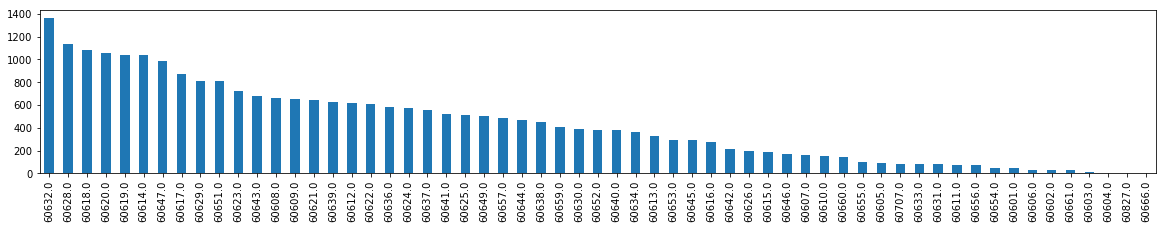

In [155]:
bar_zip = sanitation_df["ZIP Code"].value_counts()#.reset_index()
bar_zip.columns = ['Zip Code', 'Counts']
bar_zip.plot(kind='bar')
plt.rcParams["figure.figsize"] = (20,5)

## Graffity Analysis

In [16]:
# Dropping unnecessary columns
graffity_df.drop('Service Request Number', axis=1, inplace=True)
graffity_df.drop("Street Address", axis=1, inplace=True)
graffity_df.drop("X Coordinate", axis=1, inplace=True)
graffity_df.drop("Y Coordinate", axis=1, inplace=True)
graffity_df.drop("SSA", axis=1, inplace=True)
graffity_df.drop("Location", axis=1, inplace=True)

In [24]:
# Adding column with time between creation and completion of project
graffity_df = time_lapsed_col(graffity_df)

In [36]:
graffity_df['Time_Lapsed'] = graffity_df.Time_Lapsed.astype(float)

In [37]:
graffity_df.head()

,Creation Date,Status,Completion Date,Type of Service Request,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,ZIP Code,Ward,Police District,Community Area,Latitude,Longitude,Time_Lapsed
0,09/02/2016,Completed,09/02/2016,Graffiti Removal,"Cement (Sidewalk, Alley, Wall, Curb)",Front,60642.0,27.0,12.0,24.0,41.899002,-87.656474,0.0
1,09/02/2016,Completed,09/02/2016,Graffiti Removal,Wood - Unpainted,Fence,60642.0,27.0,12.0,24.0,41.898779,-87.656468,0.0
2,09/02/2016,Completed,09/02/2016,Graffiti Removal,Metal - Painted,Dumpster,60622.0,1.0,12.0,24.0,41.899428,-87.686791,0.0
3,09/02/2016,Completed,09/02/2016,Graffiti Removal,Metal - Painted,Dumpster,60622.0,1.0,12.0,24.0,41.899633,-87.686797,0.0
4,09/02/2016,Completed,09/02/2016,Graffiti Removal,Metal - Painted,Dumpster,60622.0,1.0,12.0,24.0,41.897112,-87.686729,0.0


In [38]:
graffity_df['Type of Service Request'].value_counts()

Graffiti Removal    63327
Name: Type of Service Request, dtype: int64

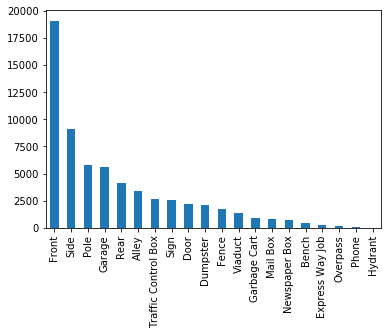

In [42]:
locations_counts = graffity_df['Where is the Graffiti located?'].value_counts()
locations_counts.plot("bar")

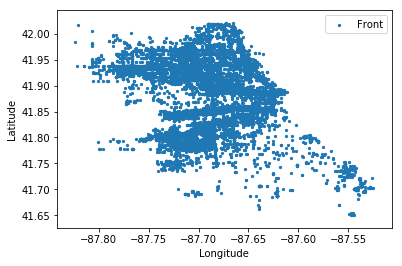

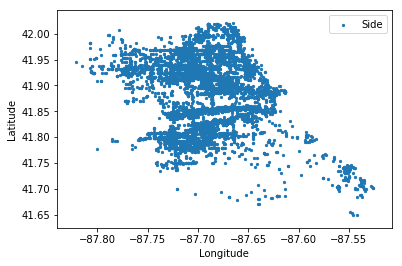

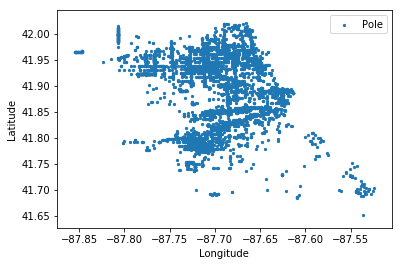

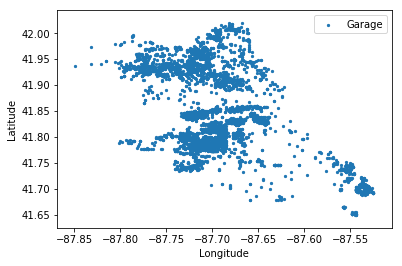

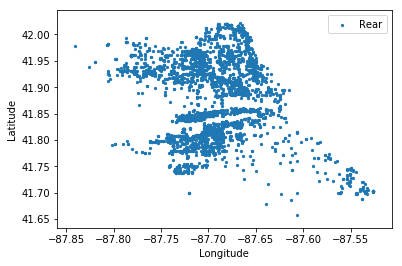

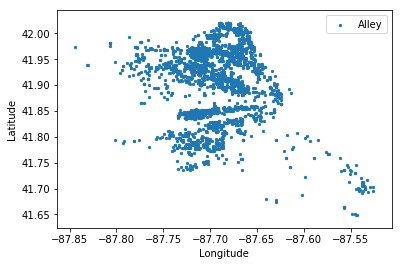

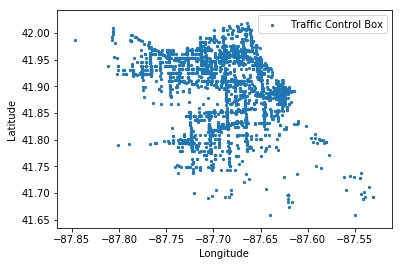

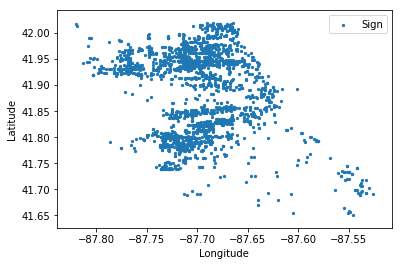

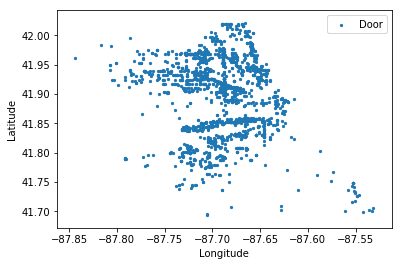

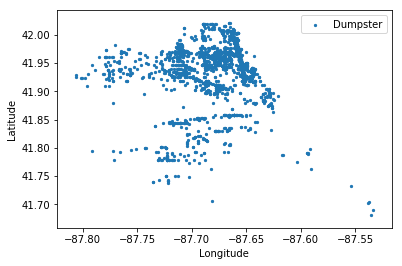

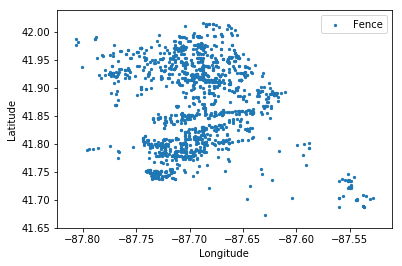

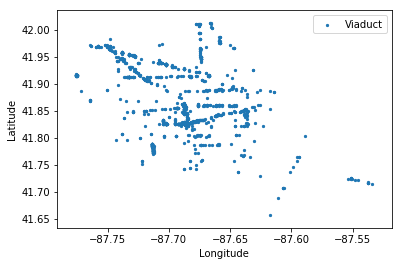

In [45]:
for ctype, count in locations_counts.iteritems():
    if ctype != 'Other' and count > 1000:
        df = graffity_df[graffity_df['Where is the Graffiti located?'] == ctype]
        df.plot(kind='scatter', x='Longitude', y='Latitude', label=ctype, marker=".")
        plt.show()

In [32]:
graffity_df = graffity_df.drop(graffity_df.index[graffity_df["ZIP Code"] == 0.0])
graffity_df = graffity_df.drop(graffity_df.index[graffity_df["Police District"] == 0.0])
graffity_df = graffity_df.drop(graffity_df.index[graffity_df["Ward"] == 0.0])

In [35]:
graffity_df.groupby('ZIP Code')['Time_Lapsed'].mean().sort_values(ascending = False)

ZIP Code
60827.0    1.333333
60645.0    1.108738
60653.0    1.066667
60659.0    1.045283
60619.0    1.034884
60649.0    1.025974
60660.0    0.996241
60651.0    0.939279
60626.0    0.933824
60638.0    0.905263
60661.0    0.902985
60625.0    0.900824
60623.0    0.900591
60618.0    0.891981
60637.0    0.836538
60610.0    0.834081
60644.0    0.830846
60611.0    0.813084
60652.0    0.812753
60657.0    0.807138
60614.0    0.778748
60601.0    0.764103
60630.0    0.763033
60615.0    0.755556
60617.0    0.745746
60646.0    0.732759
60640.0    0.703190
60641.0    0.702915
60632.0    0.687367
60629.0    0.682762
60605.0    0.678133
60656.0    0.676471
60635.0    0.666667
60643.0    0.666667
60603.0    0.658537
60602.0    0.644231
60633.0    0.638889
60608.0    0.638237
60642.0    0.605392
60654.0    0.603175
60606.0    0.595960
60613.0    0.595886
60621.0    0.590476
60607.0    0.575203
60624.0    0.563025
60612.0    0.555439
60616.0    0.551297
60647.0    0.535493
60609.0    0.484228
60639.0    

In [81]:
pd.DataFrame(graffity_df.groupby('Ward')['Type of Service Request'].value_counts())

,,Type of Service Request
Ward,Type of Service Request,
1.0,Graffiti Removal,4234
2.0,Graffiti Removal,1119
3.0,Graffiti Removal,290
4.0,Graffiti Removal,405
5.0,Graffiti Removal,186
6.0,Graffiti Removal,66
7.0,Graffiti Removal,180
8.0,Graffiti Removal,64
9.0,Graffiti Removal,123


### Vacant Building Analysis

In [52]:
# Dropping columns not used for Analysis and drop ZIP Code, Police District, and Ward which are 0. 
vacant_df.drop('SERVICE REQUEST TYPE', axis=1, inplace=True)
vacant_df.drop("SERVICE REQUEST NUMBER", axis=1, inplace=True)
vacant_df.drop("ADDRESS STREET NUMBER", axis=1, inplace=True)
vacant_df.drop("ADDRESS STREET DIRECTION", axis=1, inplace=True)
vacant_df.drop("ADDRESS STREET NAME", axis=1, inplace=True)
vacant_df.drop("ADDRESS STREET SUFFIX", axis=1, inplace=True)
vacant_df.drop("X COORDINATE", axis=1, inplace=True)
vacant_df.drop("Y COORDINATE", axis=1, inplace=True)
vacant_df.drop("Location", axis=1, inplace=True)
vacant_df = vacant_df.drop(vacant_df.index[vacant_df["ZIP CODE"] == 0.0])
vacant_df = vacant_df.drop(vacant_df.index[vacant_df["Police District"] == 0.0])
vacant_df = vacant_df.drop(vacant_df.index[vacant_df["Ward"] == 0.0])

In [53]:
vacant_df.head()

,DATE SERVICE REQUEST WAS RECEIVED,"LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).",IS THE BUILDING DANGEROUS OR HAZARDOUS?,IS BUILDING OPEN OR BOARDED?,"IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?",IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?,IS THE BUILDING VACANT DUE TO FIRE?,"ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)",ZIP CODE,Ward,Police District,Community Area,LATITUDE,LONGITUDE
0,01/02/2016,Front,NaN,Open,FRONT-SIDE AND REAR,Vacant,False,True,60621.0,16.0,7.0,68.0,41.786386,-87.651033
1,01/03/2016,Front,NaN,Open,NaN,Vacant,False,False,60629.0,23.0,8.0,66.0,41.778832,-87.712726
2,01/03/2016,Front,NaN,Open,"CALLER DOESN'T KNOW THE EXACT ADDRESS, CALLER ...",Vacant,False,False,60636.0,16.0,7.0,67.0,41.786764,-87.663167
3,01/03/2016,Front,NaN,Open,FRONT ENTRY,Vacant,False,False,60620.0,21.0,6.0,71.0,41.742258,-87.641018
4,01/03/2016,Rear,NaN,Open,REAR,Vacant,False,False,60620.0,21.0,6.0,71.0,41.746654,-87.652421


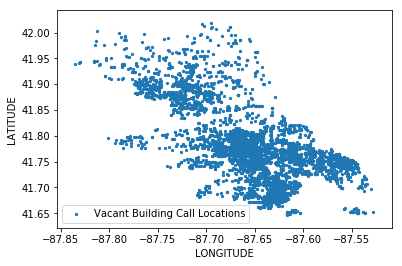

In [74]:
vacant_df.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', label='Vacant Building Call Locations', marker=".")
plt.show()

In [78]:
g = vacant_df.groupby('Ward')
g.count()

,DATE SERVICE REQUEST WAS RECEIVED,"LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).",IS THE BUILDING DANGEROUS OR HAZARDOUS?,IS BUILDING OPEN OR BOARDED?,"IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?",IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?,IS THE BUILDING VACANT DUE TO FIRE?,"ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)",ZIP CODE,Police District,Community Area,LATITUDE,LONGITUDE
Ward,,,,,,,,,,,,,
1.0,30,24,0,24,7,24,24,24,30,30,30,30,30
2.0,8,8,0,8,4,8,8,8,8,8,8,8,8
3.0,90,80,0,80,53,80,79,79,90,90,90,90,90
4.0,38,32,0,32,20,32,32,32,38,38,38,38,38
5.0,67,51,0,52,30,52,52,52,67,67,67,67,67
6.0,451,405,0,406,274,406,406,406,451,451,451,451,451
7.0,274,227,0,227,134,227,227,227,274,274,274,274,274
8.0,320,285,0,286,190,286,279,285,286,320,320,320,320
9.0,354,302,0,302,192,302,302,302,354,354,354,354,354


### Pothole Analysis

In [61]:
potholes_df.shape

(71953, 19)

In [62]:
potholes_df.columns

Index(['CREATION DATE', 'STATUS', 'COMPLETION DATE', 'SERVICE REQUEST NUMBER',
       'TYPE OF SERVICE REQUEST', 'CURRENT ACTIVITY', 'MOST RECENT ACTION',
       'NUMBER OF POTHOLES FILLED ON BLOCK', 'STREET ADDRESS', 'ZIP',
       'X COORDINATE', 'Y COORDINATE', 'Ward', 'Police District',
       'Community Area', 'SSA', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [63]:
for i, row in potholes_df.iterrows():
    creation_date = row['CREATION DATE']
    completion_date = row['COMPLETION DATE']
    if type(creation_date) == str and type(completion_date) == str:
        tl = time_lapsed(creation_date, completion_date)
        potholes_df.loc[i, 'Time_Lapsed'] = tl
    else:
        potholes_df.loc[i, 'Time_Lapsed'] = np.NaN

In [68]:
potholes_df = potholes_df.drop(potholes_df.index[potholes_df["ZIP"] == 0.0])
potholes_df = potholes_df.drop(potholes_df.index[potholes_df["Police District"] == 0.0])
potholes_df = potholes_df.drop(potholes_df.index[potholes_df["Ward"] == 0.0])

In [69]:
potholes_df.groupby('ZIP')['Time_Lapsed'].mean().sort_values(ascending = False)

ZIP
60666.0    74.400000
60635.0    48.666667
60626.0    43.231771
60625.0    39.453333
60659.0    38.675653
60660.0    38.490876
60641.0    38.179831
60630.0    36.364545
60645.0    32.487899
60631.0    30.107169
60618.0    28.113298
60640.0    27.871769
60646.0    27.847903
60634.0    27.527212
60656.0    26.447257
60639.0    26.077326
60633.0    23.909283
60827.0    23.309735
60655.0    20.745403
60615.0    20.591270
60623.0    19.700952
60621.0    19.048969
60638.0    18.811205
60637.0    18.555338
60619.0    18.317438
60613.0    17.664983
60643.0    16.812265
60652.0    16.517640
60649.0    16.105753
60629.0    15.543067
60617.0    15.235105
60632.0    15.140787
60605.0    14.526196
60707.0    14.479199
60628.0    14.414291
60657.0    14.391426
60644.0    13.407194
60601.0    12.973837
60620.0    12.667542
60616.0    12.643312
60609.0    12.311963
60651.0    12.070750
60608.0    11.290881
60636.0    11.090401
60647.0    10.932768
60653.0     9.732075
60661.0     9.620000
60624.0  

In [71]:
potholes_df["MOST RECENT ACTION"].groupby(potholes_df["ZIP"]).value_counts()

ZIP      MOST RECENT ACTION                                                 
60601.0  Pothole Patched                                                        302
         No Potholes Found                                                       16
         No Action - See Remarks in Description                                   2
         CDOT Inspect Public Way Survey Transfer Outcome                          1
         CDOT Pavement Cave-In Survey Transfer Outcome                            1
         No Such Address Found                                                    1
         Not Within CDOT Jurisdiction                                             1
60602.0  Pothole Patched                                                         66
         No Potholes Found                                                       14
         CDOT Alley Pot Hole Transfer Outcome                                     1
         Street Resurfaced                                                        1

In [74]:
pd.DataFrame(potholes_df.groupby('Ward')['TYPE OF SERVICE REQUEST'].value_counts())

,,TYPE OF SERVICE REQUEST
Ward,TYPE OF SERVICE REQUEST,
1.0,Pothole in Street,1088
2.0,Pothole in Street,1773
3.0,Pothole in Street,820
4.0,Pothole in Street,1060
5.0,Pothole in Street,1397
6.0,Pothole in Street,1505
7.0,Pothole in Street,1220
8.0,Pothole in Street,2221
9.0,Pothole in Street,1770


Question: Based on these summary statistics, tell me 5 interesting things you learned (about Chicago and the different neighborhoods) using the 311 data.

1. From the above analysis, we can see that, for the most part, there appear certain ZIP codes for which response time is longer, and those for which it's consistently shorter. For instance, the ZIP Code 60827. 

2. There appears to be a clustering of vacant buildings in the south side, as evidenced by the map of Lat/Long. 

3. Requests regarding graffiti's tend to be clustered consistently in the North side of the city. 

4. It also appears that there are certain wards which always have a high number of requests.

5. 